# Visual method to estimate the correct value of ultrametric sequence hyperparameters

Notebook to explore hyper-parameters and select a temperature and a block size for random blocks which have roughly equivalent dataset exploration

## Sequence parameters

In [1]:
T = 0.2
split_length = [1000]
tree_depth = 3 #3 for MNIST
tree_branching = 2 #other values not supported yet
seq_length = 300000

## Sequence generation 

Generate the sequence necessary for HP exploration: an ultrametric sequence and a random blocks sequence

In [2]:
import os
import matplotlib.pyplot as plt
import random
nwd = '/Users/Antonin/Documents/Documents/ENS 2A/Stage M1/Code/github/Ultrametric-benchmark'
os.chdir(nwd)
from trainer import Trainer
from dataset import Dataset

In [3]:
mnist_ds = Dataset(data_origin='MNIST')
trainer_um = Trainer(dataset=mnist_ds, network='network', training_type='ultrametric',
                    memory_sampling='reservoir sampling', memory_sz=10, sequence_length=seq_length,
                    energy_step=1, T=T, split_length_list=split_length)
trainer_rb = Trainer(dataset=mnist_ds, network='network', training_type='random_blocks2',
                    memory_sampling='reservoir sampling', memory_sz=10, sequence_length=seq_length,
                    energy_step=1, T=T, split_length_list=split_length)

Generate the digits sequences for both cases

In [4]:
trainer_um.make_train_sequence()
trainer_rb.make_train_sequence()


Transition rates vector : [0.00000000e+00 9.93262357e-01 3.34627456e-03 3.34627456e-03
 1.12735103e-05 1.12735103e-05 1.12735103e-05 1.12735103e-05]


## Plot labels history

In [5]:
def lbl_history(seq, T_list, shuffled_blocksz=None, strides=None):
    n_Ts = len(T_list)
    assert (n_Ts>0)
    t_explr = None

    lbls_fig = plt.figure(figsize=(18,10*n_Ts))
    lbls_axes = []

    for T_id, T in enumerate(T_list):
        if shuffled_blocksz is None:
            occur_id = random.randint(0, len(seq)-1)
        else:
            occur_id = random.randint(0, len(self.train_labels_shfl[T][shuffled_blocksz])-1)
            seq = self.train_labels_shfl[T][shuffled_blocksz][occur_id]

        n_labels = len(set(seq))
        lbls_ax = plt.subplot(n_Ts, 1, 1+T_id)
        lbls_axes.append(lbls_ax)
        lbls_ax.plot(seq)

        obs_lbl_set = set()
        nobs_seq = []
        for itr_id, lbl in enumerate(seq):
            obs_lbl_set.add(lbl)
            nobs_seq.append(len(obs_lbl_set))
            if t_explr is None and len(obs_lbl_set) == n_labels:
                t_explr = itr_id

        lbls_ax.plot(nobs_seq)
        if strides is not None:
            for stride in strides:
                lbls_ax.axvline(x=stride, ymin=0, ymax=n_labels)

        ttl = 'History of labels in the original training sequence - T='+str(T)
        if t_explr:
            ttl = ttl+' - tau_asym=' + str(t_explr)
    plt.show()
    return lbls_fig, lbls_axes

Plot the Ultrametric sequence and the history of visited labels

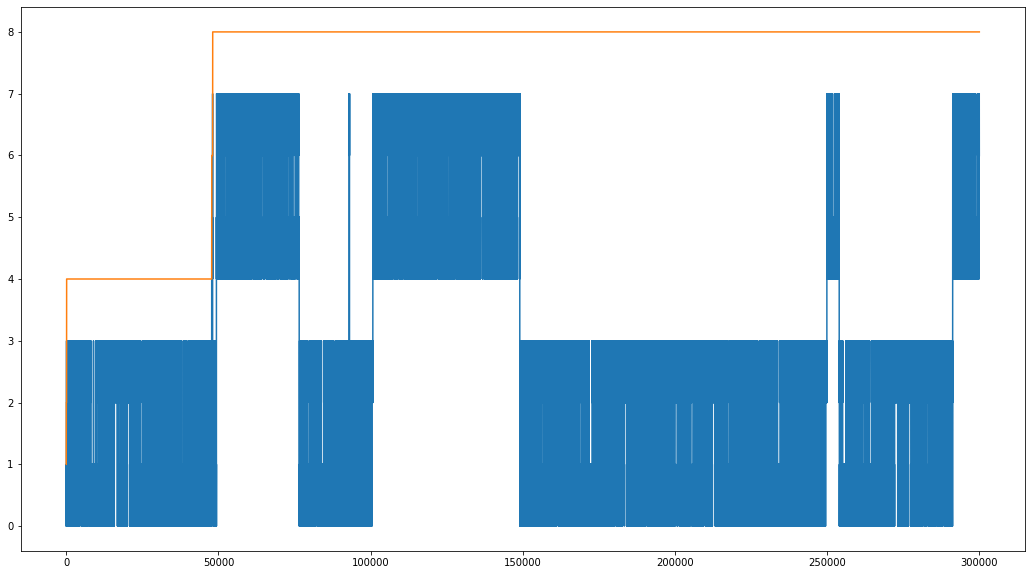

(<Figure size 1296x720 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x2a1c50e7f98>])

In [6]:
lbl_history(trainer_um.train_sequence, [T]) 

Plot the Random Blocks sequence and the history of visited labels

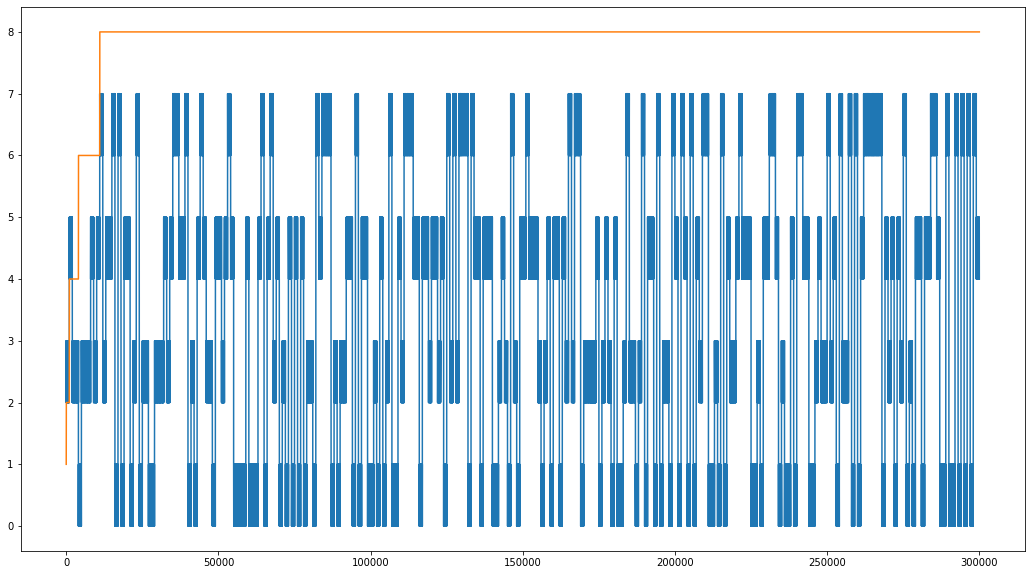

(<Figure size 1296x720 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x2a1c5298f98>])

In [7]:
lbl_history(trainer_rb.train_sequence, [T]) 